In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data exploration / Brainstorm

In [2]:
df = pd.read_csv('Kalpana_spreadsheet_exercises.csv')
# pd.set_option('display.max_columns', None)

In [3]:
df.shape

(7049, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7049 non-null   object 
 1   gender                      7049 non-null   object 
 2   is_senior_citizen           7049 non-null   int64  
 3   partner                     7049 non-null   object 
 4   dependents                  7049 non-null   object 
 5   phone_service               7049 non-null   int64  
 6   internet_service            7049 non-null   int64  
 7   contract_type               7049 non-null   int64  
 8   payment_type                7049 non-null   object 
 9   monthly_charges             7049 non-null   float64
 10  total_charges               7038 non-null   float64
 11  churn                       7049 non-null   object 
 12  tenure                      7049 non-null   float64
 13  is_female                   7049 

In [5]:
df.to_csv('creating_the_story.csv')

In [6]:
df = df.dropna()

In [7]:
df.shape

(7038, 26)

In [8]:
df['internet_service'] = df.internet_service.replace([0, 1, 2], ['No_internet', 'DSL', "Fiber"])

In [9]:
df.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internet,partner_dependents,calculated_monthly_charges,Validate,Phone_service_type,Internet_service_type,Contract_type,Rounded_tenure,Service_type
0,0002-ORFBO,Female,0,Yes,Yes,1,DSL,1,Mailed check,65.6,...,True,True,3,65.6,TRUE,One Line,DSL,1 Year,9.0,Internet+Phone
1,0003-MKNFE,Male,0,No,No,2,DSL,0,Mailed check,59.9,...,True,True,0,59.9,TRUE,Two or More Lines,DSL,Month-to-Month,9.0,Internet+Phone
2,0004-TLHLJ,Male,0,No,No,1,Fiber,0,Electronic check,73.9,...,True,True,0,73.9,TRUE,One Line,Fiber Optic,Month-to-Month,4.0,Internet+Phone
3,0011-IGKFF,Male,1,Yes,No,1,Fiber,0,Electronic check,98.0,...,True,True,1,98,TRUE,One Line,Fiber Optic,Month-to-Month,13.0,Internet+Phone
4,0013-EXCHZ,Female,1,Yes,No,1,Fiber,0,Mailed check,83.9,...,True,True,1,83.9,TRUE,One Line,Fiber Optic,Month-to-Month,3.0,Internet+Phone


In [10]:
pd.crosstab(df.internet_service, df.churn)

churn,No,Yes
internet_service,,
DSL,1957,460
Fiber,1801,1297
No_internet,1410,113


In [11]:
pd.set_option('display.max_columns', None)

## Does having dependents affect churn?

In [12]:
pd.crosstab(df.dependents, df.churn, normalize = 'index')

churn,No,Yes
dependents,,
No,0.687272,0.312728
Yes,0.844582,0.155418


It appears that those who have dependents actually churn at a lower rate than those without dependents.

## Does having a partner affect churn?

In [13]:
pd.crosstab(df.partner, df.churn, normalize = 'index')

churn,No,Yes
partner,,
No,0.670330,0.329670
Yes,0.802825,0.197175


## Does gender affect churn?

In [14]:
pd.crosstab(df.gender, df.churn, normalize = 'index')

churn,No,Yes
gender,,
Female,0.730350,0.269650
Male,0.738176,0.261824


## Does being a senior citizen affect churn?

In [15]:
pd.crosstab(df.is_senior_citizen, df.churn, normalize = 'index')

churn,No,Yes
is_senior_citizen,,
0,0.763569,0.236431
1,0.583187,0.416813


## Does the contract type affect churn?

In [16]:
pd.crosstab(df.contract_type, df.churn, normalize = 'index')

churn,No,Yes
contract_type,,
0,0.572755,0.427245
1,0.887458,0.112542
2,0.971547,0.028453


It appears that those who are paying month-to-month have a significantly higher churn rate that those who are under contract. This is something that should be looked at more closely.

Text(0, 0.5, 'Churn Rate %')

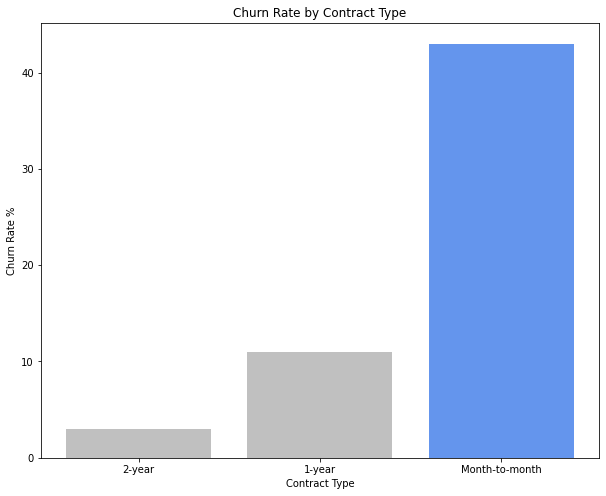

In [17]:
x2 = ['2-year', '1-year', 'Month-to-month']
y2 = [3, 11, 43]

plt.bar(x2, y2, color = ['silver', 'silver', 'cornflowerblue'])
plt.gcf().set_size_inches(10, 8)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate %')

## Do those without contracts typically pay more than those with contracts?

In [18]:
df.groupby('contract_type').mean().monthly_charges

contract_type
0    66.389229
1    65.092475
2    60.823977
Name: monthly_charges, dtype: float64

# Price comparison between internet services

In [19]:
df.groupby('internet_service').mean().monthly_charges

internet_service
DSL            58.076603
Fiber          91.503970
No_internet    21.073966
Name: monthly_charges, dtype: float64

Text(0, 0.5, 'Average Monthly Prices in USD')

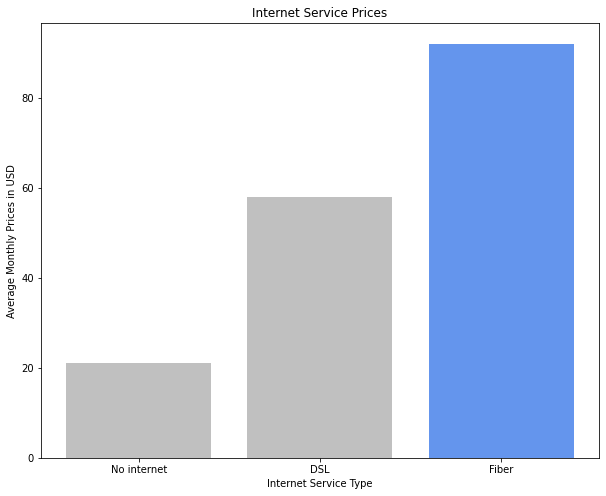

In [20]:
x3 = ['No internet', 'DSL', 'Fiber']
y3 = [21, 58, 92]

plt.bar(x3, y3, color = ['silver', 'silver', 'cornflowerblue'])
plt.gcf().set_size_inches(10, 8)
plt.title('Internet Service Prices')
plt.xlabel('Internet Service Type')
plt.ylabel('Average Monthly Prices in USD')

# Percentage of Fiber customers on month-to-month

In [21]:
pd.crosstab(df.internet_service, df.contract_type, normalize = 'index')

contract_type,0,1,2
internet_service,,,
DSL,0.506413,0.235830,0.257758
Fiber,0.686895,0.174629,0.138476
No_internet,0.344058,0.239002,0.416940


# Percentage of Fiber customers on E-check

In [22]:
pd.crosstab(df.internet_service, df.payment_type, normalize='index')

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
internet_service,,,,
DSL,0.233761,0.245345,0.268101,0.252793
Fiber,0.208844,0.193028,0.514848,0.083280
No_internet,0.219304,0.217991,0.080105,0.482600


Can we make it more attractive to go on a contract by lowering the price of our contracted plans? Especially for contract 1.

In [23]:
df.groupby('contract_type').mean().monthly_charges

contract_type
0    66.389229
1    65.092475
2    60.823977
Name: monthly_charges, dtype: float64

There does not appear to be a SIGNIFICANT difference in monthly payments bewtween month-to-month users and those under contract. 

## Perhaps someone's tenure can contribute to their churn.

In [24]:
tenure_churn_crosstab = pd.crosstab(df.Rounded_tenure, df.churn, normalize = 'index')
tenure_churn_crosstab

churn,No,Yes
Rounded_tenure,,
1.0,0.378641,0.621359
2.0,0.478448,0.521552
3.0,0.549020,0.450980
4.0,0.502924,0.497076
5.0,0.578231,0.421769
...,...,...
74.0,0.926829,0.073171
75.0,1.000000,0.000000
76.0,1.000000,0.000000


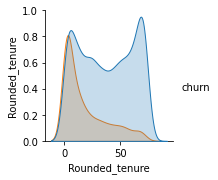

In [25]:
sns.pairplot(df[['Rounded_tenure', 'churn']], hue = 'churn')

In [26]:
tenure_churn_crosstab.Yes

Rounded_tenure
1.0     0.621359
2.0     0.521552
3.0     0.450980
4.0     0.497076
5.0     0.421769
          ...   
74.0    0.073171
75.0    0.000000
76.0    0.000000
77.0    0.000000
79.0    0.000000
Name: Yes, Length: 78, dtype: float64

### Rate of churn vs tenure

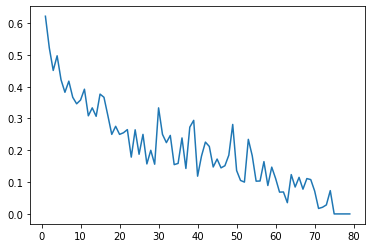

In [27]:
plt.plot(tenure_churn_crosstab.Yes)

In [28]:
tenure_churn_crosstab.No

Rounded_tenure
1.0     0.378641
2.0     0.478448
3.0     0.549020
4.0     0.502924
5.0     0.578231
          ...   
74.0    0.926829
75.0    1.000000
76.0    1.000000
77.0    1.000000
79.0    1.000000
Name: No, Length: 78, dtype: float64

### Rate of not churning vs tenure

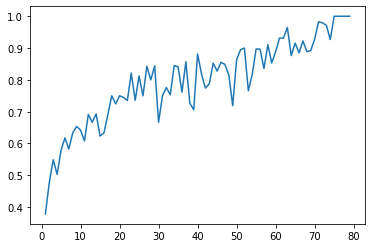

In [29]:
plt.plot(tenure_churn_crosstab.No)

It does appear that the longer someone is using services, the less likely they are to churn.

In [30]:
pd.crosstab(df.Rounded_tenure, df.contract_type)

contract_type,0,1,2
Rounded_tenure,,,
1.0,608,8,2
2.0,224,7,1
3.0,197,5,2
4.0,162,7,2
5.0,134,6,7
...,...,...,...
74.0,0,6,35
75.0,0,0,15
76.0,0,0,3


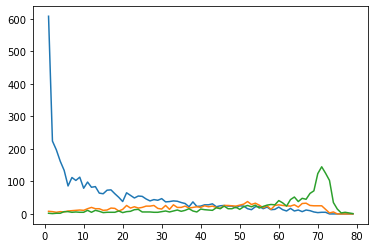

In [31]:
plt.plot(pd.crosstab(df.Rounded_tenure, df.contract_type))


## Does the type of internet service you have affect churn?

In [32]:
pd.crosstab(df.internet_service, df.churn, normalize='index')

churn,No,Yes
internet_service,,
DSL,0.809681,0.190319
Fiber,0.581343,0.418657
No_internet,0.925804,0.074196


Text(0, 0.5, 'Churn Rate %')

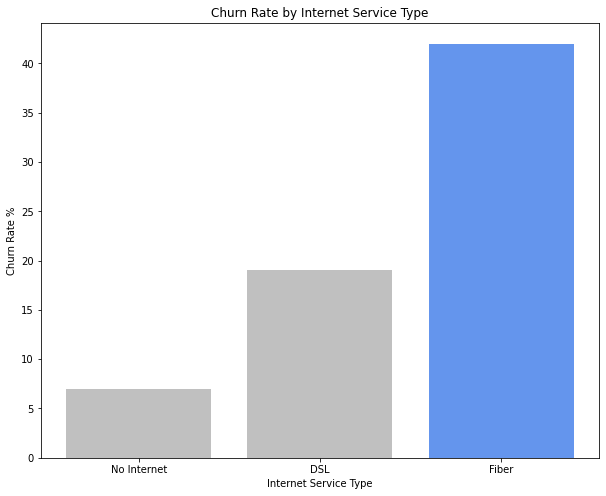

In [33]:
x = ['No Internet', 'DSL', 'Fiber']
y = [7, 19, 42]

plt.bar(x, y, color = ['silver', 'silver', 'cornflowerblue'])
plt.gcf().set_size_inches(10, 8)
plt.title('Churn Rate by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Churn Rate %')


It does appear that for some reason, those with Fiber internet churn at a much higher rate than those with DSL or with no internet. 

## Does the type of phone service you have affect churn?

In [34]:
pd.crosstab(df.phone_service, df.churn, normalize='index')

churn,No,Yes
phone_service,,
0,0.748899,0.251101
1,0.749558,0.250442
2,0.713515,0.286485


Churn rate among phone services are very consistent.

## Does payment type affect churn?

In [35]:
pd.crosstab(df.payment_type, df.churn, normalize = 'index')

churn,No,Yes
payment_type,,
Bank transfer (automatic),0.832471,0.167529
Credit card (automatic),0.847669,0.152331
Electronic check,0.547146,0.452854
Mailed check,0.807980,0.192020


Those who pay by electronic check churn at a higher rate than the other payment types. 

Text(0, 0.5, 'Churn Rate %')

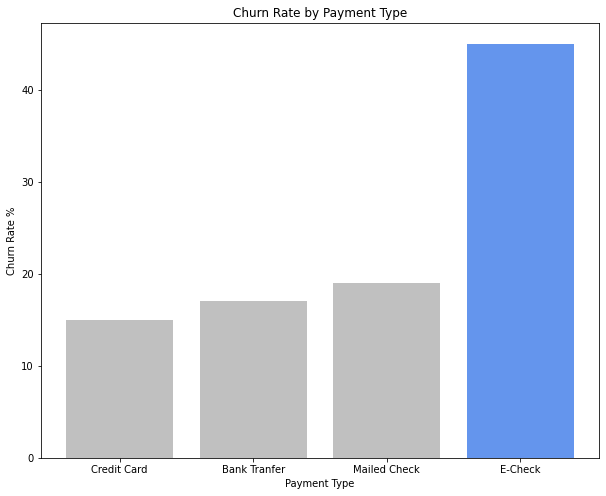

In [36]:
x1 = ['Credit Card', 'Bank Tranfer', 'Mailed Check', 'E-Check']
y1 = [15, 17, 19, 45]

plt.bar(x1, y1, color = ['silver', 'silver', 'silver', 'cornflowerblue'])
plt.gcf().set_size_inches(10, 8)
plt.title('Churn Rate by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Churn Rate %')

## What is the relation between contract type, internet service, and payment type? Specifically between month-to-month, Fiber, and electronic check payment, the three highest churn rates.

In [37]:
pd.crosstab(df.internet_service, df.contract_type, normalize='index')

contract_type,0,1,2
internet_service,,,
DSL,0.506413,0.235830,0.257758
Fiber,0.686895,0.174629,0.138476
No_internet,0.344058,0.239002,0.416940


In [38]:
pd.crosstab(df.contract_type, df.payment_type, normalize='index')

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
contract_type,,,,
0,0.152219,0.140093,0.477296,0.230392
1,0.266441,0.270508,0.235254,0.227797
2,0.333729,0.344398,0.099585,0.222288


In [39]:
pd.crosstab(df.internet_service, df.payment_type, normalize='index')

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
internet_service,,,,
DSL,0.233761,0.245345,0.268101,0.252793
Fiber,0.208844,0.193028,0.514848,0.083280
No_internet,0.219304,0.217991,0.080105,0.482600


## What about looking at tenure with those other churn drivers?

In [40]:
pd.crosstab(df.churn, df.Rounded_tenure, normalize='index')

Rounded_tenure,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,79.0
churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,0.045279,0.021478,0.021672,0.016641,0.016447,0.012190,0.014319,0.014706,0.016447,0.011803,0.014706,0.014319,0.014319,0.011803,0.009288,0.011029,0.012964,0.01219,0.009675,0.008127,0.014125,0.011803,0.013351,0.012384,0.012577,0.011029,0.011416,0.011610,0.010449,0.008901,0.010449,0.008707,0.011223,0.011610,0.010255,0.009868,0.009288,0.009288,0.006966,0.010062,0.010449,0.009288,0.010062,0.010062,0.009288,0.012577,0.010836,0.010255,0.008901,0.011029,0.013158,0.013932,0.009481,0.012964,0.011803,0.010062,0.011803,0.009868,0.011223,0.015480,0.013158,0.010449,0.015867,0.015093,0.012577,0.014899,0.016060,0.017028,0.017608,0.027477,0.033282,0.027283,0.019930,0.007353,0.002902,0.00058,0.000967,0.000193
Yes,0.205348,0.064706,0.049198,0.045455,0.033155,0.020856,0.028342,0.023529,0.024064,0.018182,0.026203,0.017647,0.019786,0.014439,0.015508,0.017647,0.016043,0.01123,0.010160,0.007487,0.013369,0.011765,0.008021,0.012299,0.008021,0.010160,0.005882,0.008021,0.005348,0.012299,0.009626,0.006952,0.010160,0.005882,0.005348,0.008556,0.004278,0.009626,0.008021,0.003743,0.006417,0.007487,0.007487,0.004813,0.005348,0.005882,0.005348,0.006417,0.009626,0.004813,0.004278,0.004278,0.008021,0.008021,0.003743,0.003209,0.006417,0.002674,0.005348,0.005348,0.002674,0.002139,0.001604,0.005882,0.003209,0.005348,0.003743,0.005882,0.005882,0.005882,0.001604,0.001604,0.001604,0.001604,0.000000,0.00000,0.000000,0.000000


In [41]:
pd.crosstab(df.internet_service, df.Rounded_tenure, normalize='index')

Rounded_tenure,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,79.0
internet_service,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DSL,0.088953,0.033513,0.028962,0.025238,0.017377,0.015722,0.017377,0.018618,0.017791,0.014067,0.016136,0.015308,0.016963,0.010343,0.010757,0.009102,0.016136,0.010343,0.007861,0.005792,0.011998,0.012826,0.013653,0.010343,0.013240,0.009930,0.011998,0.011998,0.010343,0.010757,0.009516,0.006206,0.009930,0.007034,0.007861,0.012826,0.007034,0.009102,0.005379,0.008688,0.009516,0.009516,0.009102,0.010343,0.008688,0.011998,0.008688,0.010343,0.009930,0.005792,0.011998,0.010757,0.007447,0.011171,0.011171,0.008688,0.009516,0.008275,0.010757,0.012826,0.011585,0.007447,0.012412,0.010343,0.009516,0.011585,0.012412,0.011171,0.015308,0.030203,0.031030,0.018618,0.018618,0.004137,0.002069,0.00000,0.000000,0.000000
Fiber,0.075855,0.035184,0.029051,0.025500,0.021950,0.013557,0.019045,0.015817,0.018076,0.013557,0.018722,0.012589,0.014848,0.012266,0.011298,0.015494,0.012912,0.012589,0.009684,0.007101,0.015171,0.010652,0.010329,0.011943,0.010652,0.012589,0.007747,0.010652,0.008393,0.011298,0.011620,0.010006,0.012266,0.010652,0.009684,0.008393,0.006456,0.010652,0.009361,0.006779,0.008393,0.009361,0.009684,0.007101,0.008715,0.010329,0.008715,0.010006,0.009361,0.012266,0.009684,0.010975,0.009684,0.011620,0.010975,0.009361,0.011620,0.007101,0.010652,0.012589,0.009684,0.008715,0.012589,0.014526,0.011298,0.014526,0.013234,0.015494,0.014848,0.017108,0.022272,0.026469,0.014526,0.005487,0.000646,0.00000,0.000000,0.000000
No_internet,0.110309,0.027577,0.028890,0.020355,0.024294,0.014445,0.017072,0.017072,0.020355,0.012475,0.018385,0.020355,0.015758,0.016415,0.010506,0.013132,0.011819,0.013132,0.013132,0.013132,0.014445,0.012475,0.012475,0.016415,0.009849,0.008536,0.011162,0.008536,0.008536,0.005253,0.008536,0.007879,0.009849,0.013789,0.009192,0.006566,0.012475,0.007223,0.005909,0.011162,0.011162,0.006566,0.009192,0.009192,0.006566,0.009849,0.011819,0.005909,0.007223,0.009192,0.011162,0.013132,0.010506,0.012475,0.004596,0.005253,0.009192,0.009192,0.005909,0.013132,0.009849,0.008536,0.010506,0.012475,0.008536,0.009192,0.012475,0.015758,0.012475,0.017728,0.020355,0.011162,0.010506,0.009192,0.005253,0.00197,0.003283,0.000657


In [42]:
pd.crosstab(df.payment_type, df.Rounded_tenure, normalize='index')

Rounded_tenure,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,79.0
payment_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bank transfer (automatic),0.024580,0.012937,0.009056,0.010349,0.009702,0.006468,0.011643,0.014230,0.010349,0.007762,0.016171,0.015524,0.007762,0.006468,0.009056,0.009702,0.010996,0.006468,0.009056,0.007115,0.013583,0.008409,0.012937,0.013583,0.012937,0.009056,0.009056,0.010996,0.007762,0.009702,0.011643,0.006468,0.009056,0.010349,0.010996,0.011643,0.007762,0.007762,0.007115,0.011643,0.012937,0.010349,0.006468,0.012290,0.007115,0.016171,0.012290,0.012937,0.011643,0.012290,0.015524,0.016818,0.010349,0.013583,0.014230,0.014230,0.012937,0.008409,0.009056,0.016171,0.016818,0.012290,0.015524,0.022639,0.013583,0.020052,0.018758,0.021345,0.025873,0.040750,0.047219,0.036223,0.028461,0.009702,0.003881,0.001294,0.001940,0.000000
Credit card (automatic),0.020355,0.015758,0.014445,0.009849,0.013789,0.010506,0.011162,0.007879,0.011819,0.011819,0.010506,0.006566,0.015102,0.005909,0.007223,0.013132,0.011819,0.013789,0.007879,0.007879,0.005909,0.011162,0.010506,0.011162,0.014445,0.012475,0.005909,0.013789,0.006566,0.013132,0.009192,0.011162,0.006566,0.008536,0.007879,0.013789,0.008536,0.011162,0.010506,0.005909,0.007879,0.011162,0.015758,0.006566,0.009849,0.010506,0.010506,0.013789,0.017072,0.012475,0.013132,0.013789,0.013132,0.012475,0.007879,0.011819,0.011162,0.010506,0.014445,0.017728,0.013132,0.010506,0.020355,0.017072,0.018385,0.019698,0.020355,0.023638,0.023638,0.038739,0.042022,0.041366,0.028234,0.009849,0.003940,0.000657,0.001313,0.000000
Electronic check,0.122622,0.048626,0.039746,0.037209,0.024947,0.019027,0.021564,0.021142,0.021987,0.016068,0.023256,0.018182,0.019450,0.018605,0.012685,0.014799,0.013953,0.013953,0.009725,0.004651,0.016913,0.012685,0.010148,0.012685,0.010148,0.010994,0.010571,0.009302,0.011416,0.008879,0.011416,0.008879,0.013108,0.009302,0.008457,0.008879,0.007188,0.010994,0.005497,0.007188,0.009302,0.009725,0.009725,0.007611,0.008879,0.008879,0.008457,0.006765,0.005920,0.006342,0.009302,0.008879,0.008034,0.010148,0.009302,0.005497,0.010148,0.007611,0.009725,0.010994,0.007611,0.005497,0.007611,0.006765,0.005920,0.008879,0.006342,0.007611,0.008457,0.008034,0.011416,0.007188,0.005497,0.004228,0.000846,0.000000,0.000000,0.000000
Mailed check,0.161471,0.045511,0.046135,0.032419,0.032419,0.019327,0.025561,0.022444,0.027431,0.016833,0.018080,0.018703,0.018703,0.015586,0.013716,0.012469,0.018080,0.012469,0.012469,0.013716,0.017456,0.014339,0.014963,0.011845,0.008728,0.010599,0.013716,0.009352,0.009352,0.008105,0.008105,0.006234,0.013716,0.012469,0.008728,0.004364,0.008728,0.006858,0.006858,0.009352,0.007481,0.003741,0.005611,0.008728,0.006858,0.008728,0.006858,0.004988,0.003741,0.008105,0.006234,0.007481,0.005611,0.011222,0.007481,0.003117,0.007481,0.005611,0.005611,0.007481,0.005611,0.006234,0.007481,0.007481,0.004988,0.003117,0.009352,0.007481,0.003741,0.007481,0.006858,0.004988,0.003741,0.000623,0.000623,0.000000,0.000000,0.000623


## Tenure vs. contract type

In [43]:
pd.crosstab(df.contract_type, df.Rounded_tenure, normalize='index')

Rounded_tenure,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,79.0
contract_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.156863,0.057792,0.050826,0.041796,0.034572,0.022188,0.028896,0.026574,0.029154,0.020382,0.025284,0.021156,0.021672,0.016512,0.015996,0.018834,0.019092,0.015996,0.013158,0.009804,0.016770,0.014706,0.012642,0.014190,0.013932,0.011868,0.010320,0.011352,0.010836,0.012126,0.009546,0.009804,0.010320,0.010062,0.009030,0.008256,0.005676,0.009546,0.005934,0.006192,0.007224,0.007224,0.007998,0.005676,0.006450,0.006708,0.006192,0.006192,0.004902,0.006450,0.006192,0.004128,0.003354,0.005676,0.005934,0.004128,0.005418,0.003354,0.003612,0.005418,0.003354,0.002322,0.004386,0.002322,0.003096,0.001806,0.003096,0.002580,0.001548,0.001032,0.001290,0.001290,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.005424,0.004746,0.003390,0.004746,0.004068,0.006102,0.006780,0.007458,0.008136,0.007458,0.010847,0.013559,0.010847,0.010847,0.007458,0.008136,0.012203,0.011525,0.006102,0.009492,0.017627,0.012203,0.014915,0.012203,0.013559,0.016271,0.016271,0.017627,0.011525,0.010169,0.017627,0.009492,0.018983,0.013559,0.013559,0.016271,0.012203,0.013559,0.014915,0.013559,0.016949,0.014915,0.016271,0.013559,0.011525,0.017627,0.017627,0.016949,0.016271,0.018305,0.020339,0.025763,0.019661,0.022373,0.018305,0.012881,0.016949,0.009492,0.017627,0.018983,0.017627,0.016949,0.016271,0.018983,0.014237,0.021695,0.022373,0.017627,0.016949,0.016949,0.016949,0.009492,0.002034,0.004068,0.000000,0.000000,0.000000,0.000000
2,0.001186,0.000593,0.001186,0.001186,0.004149,0.004149,0.002964,0.003557,0.002964,0.002964,0.006520,0.002964,0.006520,0.004742,0.002371,0.002964,0.002964,0.002964,0.005335,0.002371,0.004149,0.004742,0.007706,0.008299,0.003557,0.003557,0.003557,0.002964,0.002964,0.004149,0.005335,0.003557,0.005335,0.007113,0.004742,0.006520,0.009484,0.005335,0.003557,0.008892,0.007706,0.007113,0.006520,0.011263,0.009484,0.014226,0.009484,0.009484,0.012448,0.008299,0.013041,0.015412,0.013041,0.016005,0.010670,0.013634,0.016005,0.017190,0.016598,0.024303,0.020154,0.014226,0.026082,0.030824,0.022525,0.028453,0.026675,0.037344,0.042087,0.073503,0.085951,0.074096,0.061055,0.020747,0.008892,0.001778,0.002964,0.000593


Fifteen percent of our month-to-month are in the first year of their tenure.

# Three highest churn rates
## Month-to-month: 43%
## Fiber: 42%
## E-check: 45%

# Other churn rates
## Partner_yes: 20%
## Partner_no: 33%
## Male: 26%
## Female: 27%
## Senior citizen: 41%
## 1 year: 11%
## 2 year: 3%
## credit card: 15%
## bank transfer: 17%
## mailed check: 19%
## DSL: 19%
## No internet: 7%

Text(0, 0.5, 'Factors')

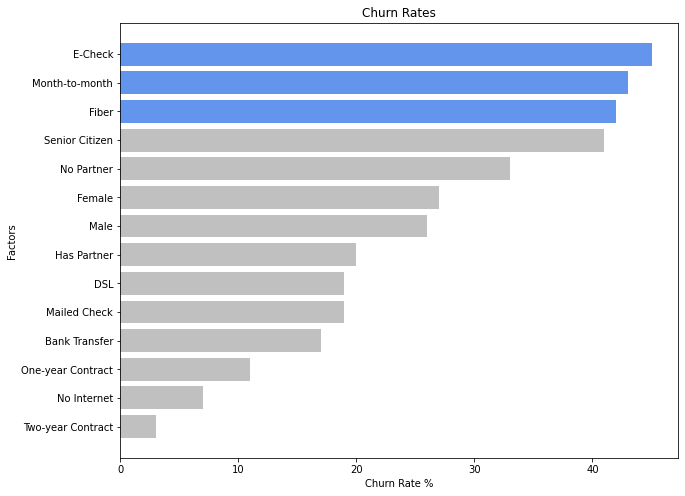

In [44]:
x4 = ['Two-year Contract', 'No Internet', 'One-year Contract', 'Bank Transfer', 'Mailed Check', 'DSL', 'Has Partner', 'Male', 'Female', 'No Partner', 'Senior Citizen', 'Fiber', 'Month-to-month', 'E-Check']
y4 = [3, 7, 11, 17, 19, 19, 20, 26, 27, 33, 41, 42, 43, 45]

plt.barh(x4, y4, color = ['silver', 'silver', 'silver', 'silver', 'silver', 'silver', 'silver', 'silver', 'silver', 'silver', 'silver', 'cornflowerblue', 'cornflowerblue', 'cornflowerblue'])
plt.gcf().set_size_inches(10, 8)
plt.title('Churn Rates')
plt.xlabel('Churn Rate %')
plt.ylabel('Factors')

# Four highest churn rates by total number churned.
## Month-to-month: 1656
## Fiber: 1297
## E-check: 1071
## Senior citizen: 476
It would probably be better to focus our efforts on the top three drivers of churn.

In [45]:
pd.crosstab(df.payment_type, df.churn)

churn,No,Yes
payment_type,,
Bank transfer (automatic),1287,259
Credit card (automatic),1291,232
Electronic check,1294,1071
Mailed check,1296,308


In [46]:
pd.crosstab(df.internet_service, df.churn)

churn,No,Yes
internet_service,,
DSL,1957,460
Fiber,1801,1297
No_internet,1410,113


In [47]:
pd.crosstab(df.contract_type, df.churn)

churn,No,Yes
contract_type,,
0,2220,1656
1,1309,166
2,1639,48


In [48]:
pd.crosstab(df.is_senior_citizen, df.churn)

churn,No,Yes
is_senior_citizen,,
0,4502,1394
1,666,476


## Potential solutions/brainstorm

We should look critically at our E-check payment process. Is it difficult to use? Does it have bugs? Is it inconvenient? We need to find a way to make it better.

Is our Fiber service lacking? Are there competitors offering better deals on Fiber? Is the competitors service speeds better?

Are competitors offering better month-to-month deals for new customers? Can we look at our pricing and find a way to beat our competitors offer?

# What kind of revenue increase can with a certain churn reduction?

Take total charged without churn, and compare to total charges with certain churned costumers. 

In [49]:
all_no_churn = df[df.churn == 'No']
all_no_churn.total_charges.sum()

13205105.45

### All customers who churned

In [50]:
all_yes_churn = df[df.churn == 'Yes']
all_yes_churn

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,calculated_monthly_charges,Validate,Phone_service_type,Internet_service_type,Contract_type,Rounded_tenure,Service_type
2,0004-TLHLJ,Male,0,No,No,1,Fiber,0,Electronic check,73.90,280.85,Yes,3.8,False,True,True,True,True,0,73.9,TRUE,One Line,Fiber Optic,Month-to-Month,4.0,Internet+Phone
3,0011-IGKFF,Male,1,Yes,No,1,Fiber,0,Electronic check,98.00,1237.85,Yes,12.6,False,True,True,True,True,1,98,TRUE,One Line,Fiber Optic,Month-to-Month,13.0,Internet+Phone
4,0013-EXCHZ,Female,1,Yes,No,1,Fiber,0,Mailed check,83.90,267.40,Yes,3.2,True,True,True,True,True,1,83.9,TRUE,One Line,Fiber Optic,Month-to-Month,3.0,Internet+Phone
18,0022-TCJCI,Male,1,No,No,1,DSL,1,Credit card (automatic),62.70,2791.50,Yes,44.5,False,True,True,True,True,0,62.7,TRUE,One Line,DSL,1 Year,45.0,Internet+Phone
19,0023-HGHWL,Male,1,No,No,0,DSL,0,Electronic check,25.10,25.10,Yes,1.0,False,True,False,True,False,0,25.1,TRUE,No Phone Service,DSL,Month-to-Month,1.0,Internet_Only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,9965-YOKZB,Male,1,No,No,2,Fiber,0,Electronic check,83.85,790.15,Yes,9.4,False,True,True,True,True,0,83.85,TRUE,Two or More Lines,Fiber Optic,Month-to-Month,9.0,Internet+Phone
7031,0032-PGELS,Female,0,Yes,Yes,0,DSL,0,Bank transfer (automatic),30.50,30.50,Yes,1.0,True,True,False,True,False,3,30.5,TRUE,No Phone Service,DSL,Month-to-Month,1.0,Internet_Only
7042,9985-MWVIX,Female,0,No,No,1,Fiber,0,Mailed check,70.15,70.15,Yes,1.0,True,True,True,True,True,0,70.15,TRUE,One Line,Fiber Optic,Month-to-Month,1.0,Internet+Phone
7043,9986-BONCE,Female,0,No,No,1,No_internet,0,Bank transfer (automatic),20.95,85.50,Yes,4.1,True,True,True,False,False,0,20.95,TRUE,One Line,No Internet Service,Month-to-Month,4.0,Phone Only


### All fiber customers who churned

In [51]:
all_fiber_churn = all_yes_churn[all_yes_churn.internet_service == 'Fiber']
all_fiber_churn

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,calculated_monthly_charges,Validate,Phone_service_type,Internet_service_type,Contract_type,Rounded_tenure,Service_type
2,0004-TLHLJ,Male,0,No,No,1,Fiber,0,Electronic check,73.90,280.85,Yes,3.8,False,True,True,True,True,0,73.9,TRUE,One Line,Fiber Optic,Month-to-Month,4.0,Internet+Phone
3,0011-IGKFF,Male,1,Yes,No,1,Fiber,0,Electronic check,98.00,1237.85,Yes,12.6,False,True,True,True,True,1,98,TRUE,One Line,Fiber Optic,Month-to-Month,13.0,Internet+Phone
4,0013-EXCHZ,Female,1,Yes,No,1,Fiber,0,Mailed check,83.90,267.40,Yes,3.2,True,True,True,True,True,1,83.9,TRUE,One Line,Fiber Optic,Month-to-Month,3.0,Internet+Phone
21,0023-XUOPT,Female,0,Yes,No,2,Fiber,0,Electronic check,94.10,1215.60,Yes,12.9,True,True,True,True,True,1,94.1,TRUE,Two or More Lines,Fiber Optic,Month-to-Month,13.0,Internet+Phone
53,0093-XWZFY,Male,0,No,No,2,Fiber,0,Credit card (automatic),104.50,4036.85,Yes,38.6,False,True,True,True,True,0,104.5,TRUE,Two or More Lines,Fiber Optic,Month-to-Month,39.0,Internet+Phone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7013,9948-YPTDG,Male,0,Yes,No,1,Fiber,0,Electronic check,79.45,3013.05,Yes,37.9,False,True,True,True,True,1,79.45,TRUE,One Line,Fiber Optic,Month-to-Month,38.0,Internet+Phone
7020,9961-JBNMK,Male,1,No,No,1,Fiber,0,Bank transfer (automatic),96.80,2030.30,Yes,21.0,False,True,True,True,True,0,96.8,TRUE,One Line,Fiber Optic,Month-to-Month,21.0,Internet+Phone
7023,9965-YOKZB,Male,1,No,No,2,Fiber,0,Electronic check,83.85,790.15,Yes,9.4,False,True,True,True,True,0,83.85,TRUE,Two or More Lines,Fiber Optic,Month-to-Month,9.0,Internet+Phone
7042,9985-MWVIX,Female,0,No,No,1,Fiber,0,Mailed check,70.15,70.15,Yes,1.0,True,True,True,True,True,0,70.15,TRUE,One Line,Fiber Optic,Month-to-Month,1.0,Internet+Phone


In [52]:
all_fiber_churn.total_charges.sum()

2483257.4499999997

In [53]:
all_fiber_churn.monthly_charges.mean()

88.12648419429449

In [54]:
fiber_churn_tenure = all_fiber_churn.tenure.sort_values()
fiber_churn_tenure

6005     1.0
1353     1.0
2601     1.0
661      1.0
663      1.0
        ... 
3752    71.8
2282    72.9
2003    73.7
625     73.8
2730    74.2
Name: tenure, Length: 1297, dtype: float64

Text(0, 0.5, 'Number of Churns')

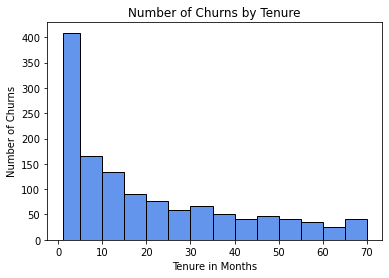

In [55]:
plt.hist(fiber_churn_tenure, bins = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70], color = ['cornflowerblue'], edgecolor = 'black')
plt.title('Number of Churns by Tenure')
plt.xlabel('Tenure in Months')
plt.ylabel('Number of Churns')

In [56]:
fiber_churn_tenure.to_csv('fiber_churn_to_tenure.csv')

### All E-Check customers who churned

In [57]:
all_echeck_churn = all_yes_churn[all_yes_churn.payment_type == 'Electronic check']
all_echeck_churn

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,calculated_monthly_charges,Validate,Phone_service_type,Internet_service_type,Contract_type,Rounded_tenure,Service_type
2,0004-TLHLJ,Male,0,No,No,1,Fiber,0,Electronic check,73.90,280.85,Yes,3.8,False,True,True,True,True,0,73.9,TRUE,One Line,Fiber Optic,Month-to-Month,4.0,Internet+Phone
3,0011-IGKFF,Male,1,Yes,No,1,Fiber,0,Electronic check,98.00,1237.85,Yes,12.6,False,True,True,True,True,1,98,TRUE,One Line,Fiber Optic,Month-to-Month,13.0,Internet+Phone
19,0023-HGHWL,Male,1,No,No,0,DSL,0,Electronic check,25.10,25.10,Yes,1.0,False,True,False,True,False,0,25.1,TRUE,No Phone Service,DSL,Month-to-Month,1.0,Internet_Only
21,0023-XUOPT,Female,0,Yes,No,2,Fiber,0,Electronic check,94.10,1215.60,Yes,12.9,True,True,True,True,True,1,94.1,TRUE,Two or More Lines,Fiber Optic,Month-to-Month,13.0,Internet+Phone
40,0067-DKWBL,Male,1,No,No,1,DSL,0,Electronic check,49.25,91.10,Yes,1.8,False,True,True,True,True,0,49.25,TRUE,One Line,DSL,Month-to-Month,2.0,Internet+Phone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7010,9944-HKVVB,Female,0,No,No,1,Fiber,0,Electronic check,95.10,307.40,Yes,3.2,True,True,True,True,True,0,95.1,TRUE,One Line,Fiber Optic,Month-to-Month,3.0,Internet+Phone
7012,9947-OTFQU,Male,1,No,No,1,Fiber,0,Electronic check,74.40,1074.30,Yes,14.4,False,True,True,True,True,0,74.4,TRUE,One Line,Fiber Optic,Month-to-Month,14.0,Internet+Phone
7013,9948-YPTDG,Male,0,Yes,No,1,Fiber,0,Electronic check,79.45,3013.05,Yes,37.9,False,True,True,True,True,1,79.45,TRUE,One Line,Fiber Optic,Month-to-Month,38.0,Internet+Phone
7023,9965-YOKZB,Male,1,No,No,2,Fiber,0,Electronic check,83.85,790.15,Yes,9.4,False,True,True,True,True,0,83.85,TRUE,Two or More Lines,Fiber Optic,Month-to-Month,9.0,Internet+Phone


In [58]:
all_echeck_churn.total_charges.sum()

1567576.4000000001

### All month-to-month customer who churned

In [59]:
all_contract_churn = all_yes_churn[all_yes_churn.contract_type == 0]
all_contract_churn

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,calculated_monthly_charges,Validate,Phone_service_type,Internet_service_type,Contract_type,Rounded_tenure,Service_type
2,0004-TLHLJ,Male,0,No,No,1,Fiber,0,Electronic check,73.90,280.85,Yes,3.8,False,True,True,True,True,0,73.9,TRUE,One Line,Fiber Optic,Month-to-Month,4.0,Internet+Phone
3,0011-IGKFF,Male,1,Yes,No,1,Fiber,0,Electronic check,98.00,1237.85,Yes,12.6,False,True,True,True,True,1,98,TRUE,One Line,Fiber Optic,Month-to-Month,13.0,Internet+Phone
4,0013-EXCHZ,Female,1,Yes,No,1,Fiber,0,Mailed check,83.90,267.40,Yes,3.2,True,True,True,True,True,1,83.9,TRUE,One Line,Fiber Optic,Month-to-Month,3.0,Internet+Phone
19,0023-HGHWL,Male,1,No,No,0,DSL,0,Electronic check,25.10,25.10,Yes,1.0,False,True,False,True,False,0,25.1,TRUE,No Phone Service,DSL,Month-to-Month,1.0,Internet_Only
21,0023-XUOPT,Female,0,Yes,No,2,Fiber,0,Electronic check,94.10,1215.60,Yes,12.9,True,True,True,True,True,1,94.1,TRUE,Two or More Lines,Fiber Optic,Month-to-Month,13.0,Internet+Phone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,9965-YOKZB,Male,1,No,No,2,Fiber,0,Electronic check,83.85,790.15,Yes,9.4,False,True,True,True,True,0,83.85,TRUE,Two or More Lines,Fiber Optic,Month-to-Month,9.0,Internet+Phone
7031,0032-PGELS,Female,0,Yes,Yes,0,DSL,0,Bank transfer (automatic),30.50,30.50,Yes,1.0,True,True,False,True,False,3,30.5,TRUE,No Phone Service,DSL,Month-to-Month,1.0,Internet_Only
7042,9985-MWVIX,Female,0,No,No,1,Fiber,0,Mailed check,70.15,70.15,Yes,1.0,True,True,True,True,True,0,70.15,TRUE,One Line,Fiber Optic,Month-to-Month,1.0,Internet+Phone
7043,9986-BONCE,Female,0,No,No,1,No_internet,0,Bank transfer (automatic),20.95,85.50,Yes,4.1,True,True,True,False,False,0,20.95,TRUE,One Line,No Internet Service,Month-to-Month,4.0,Phone Only


In [60]:
all_contract_churn.total_charges.sum()

1927212.75

Text(0, 0.5, 'Amount in USD (Millions)')

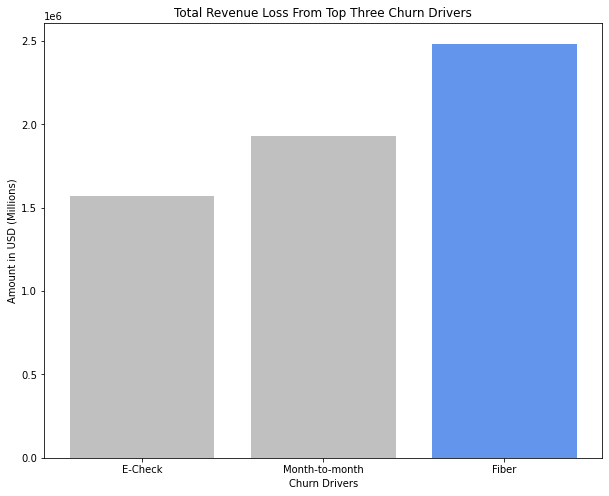

In [61]:
x5 = ['E-Check', 'Month-to-month', 'Fiber']
y5 = [1567576, 1927212, 2483257]

plt.bar(x5, y5, color = ['silver', 'silver', 'cornflowerblue'])
plt.gcf().set_size_inches(10, 8)
plt.title('Total Revenue Loss From Top Three Churn Drivers')
plt.xlabel('Churn Drivers')
plt.ylabel('Amount in USD (Millions)')

Due to this finding I believe it would be most beneficial to focus on reducing churn in Fiber first.

Recommend doing more market research to see if our fiber service is lacking in any way compared to our competitors (speed, ease of use, reliability, cost) so that we can tap into this revenue base in the future. 


# Potential Revenue Increase

In [62]:
monthly_revenue = all_no_churn.monthly_charges.sum()
monthly_revenue

316784.75

In [63]:
all_fiber_churn.monthly_charges.sum()

114300.04999999999

In [64]:
pd.crosstab(df.internet_service, df.churn, normalize='index')

churn,No,Yes
internet_service,,
DSL,0.809681,0.190319
Fiber,0.581343,0.418657
No_internet,0.925804,0.074196


We should try to bring our Fiber churn rate closer to our DSL churn rate. Essentially cutting it in half. 

In [65]:
saved_fiber_revenue = all_fiber_churn.monthly_charges.sum() / 2
saved_fiber_revenue

57150.024999999994

In [66]:
saved_fiber_revenue / monthly_revenue * 100

18.040649052708503

Text(0, 0.5, 'Amount in USD')

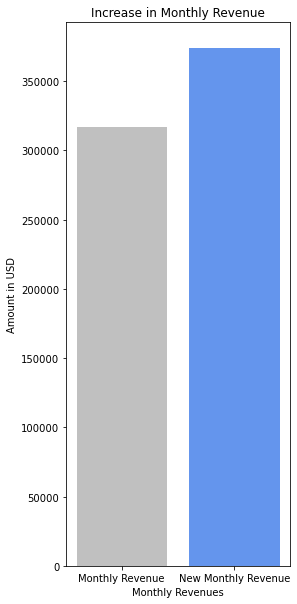

In [80]:
x6 = ['Monthly Revenue', 'New Monthly Revenue']
y6 = [monthly_revenue, (monthly_revenue + saved_fiber_revenue)]

plt.bar(x6, y6, color = ['silver', 'cornflowerblue'])
plt.gcf().set_size_inches(4,10)
plt.title('Increase in Monthly Revenue')
plt.xlabel('Monthly Revenues')
plt.ylabel('Amount in USD')

# We could see an 18% increase in monthly revenue by bringing our Fiber churn rate down to a level comparable to our DSL churn rate. 